In [2]:
import pandas as pd

# Load the data
combined = pd.read_csv("combined_cleaned.csv", index_col="Date", parse_dates=True)
returns = pd.read_csv("daily_returns.csv", index_col="Date", parse_dates=True)

# Check data
print(combined.head())
print(returns.head())


            Close_TSLA  High_TSLA   Low_TSLA  Open_TSLA  Volume_TSLA  \
Date                                                                   
2015-07-01   17.943333  18.174667  17.856667  18.073999   31518000.0   
2015-07-02   18.667999  18.830000  18.220667  18.680000  107458500.0   
2015-07-06   18.648001  18.779333  18.420000  18.591999   61828500.0   
2015-07-07   17.858667  18.346666  17.384666  18.333332   91576500.0   
2015-07-08   16.997334  17.386667  16.954000  17.288000   93316500.0   

            Close_BND   High_BND    Low_BND   Open_BND  Volume_BND  \
Date                                                                 
2015-07-01  60.816715  60.914441  60.764093  60.794164   5399300.0   
2015-07-02  60.967098  61.027240  60.937027  60.937027   1060100.0   
2015-07-06  61.177578  61.222687  61.057301  61.222687   2210700.0   
2015-07-07  61.237728  61.470769  61.237728  61.410634   4183200.0   
2015-07-08  61.410606  61.463229  61.312875  61.373017   1967800.0   

    

In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

# Focus on Tesla closing price
tsla_close = combined['Close_TSLA'].copy()

# Train-test split
train = tsla_close[:'2023-12-31']
test = tsla_close['2024-01-01':]

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (2140,)
Test shape: (395,)


In [5]:
print("NaNs in test:", test.isna().sum())
print("NaNs in forecast:", pd.Series(arima_forecast).isna().sum())

print("Infs in test:", np.isinf(test).sum())
print("Infs in forecast:", np.isinf(arima_forecast).sum())


NaNs in test: 0
NaNs in forecast: 395
Infs in test: 0
Infs in forecast: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13652.181, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13647.752, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13647.771, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13647.825, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13646.472, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13648.219, Time=0.92 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.909 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


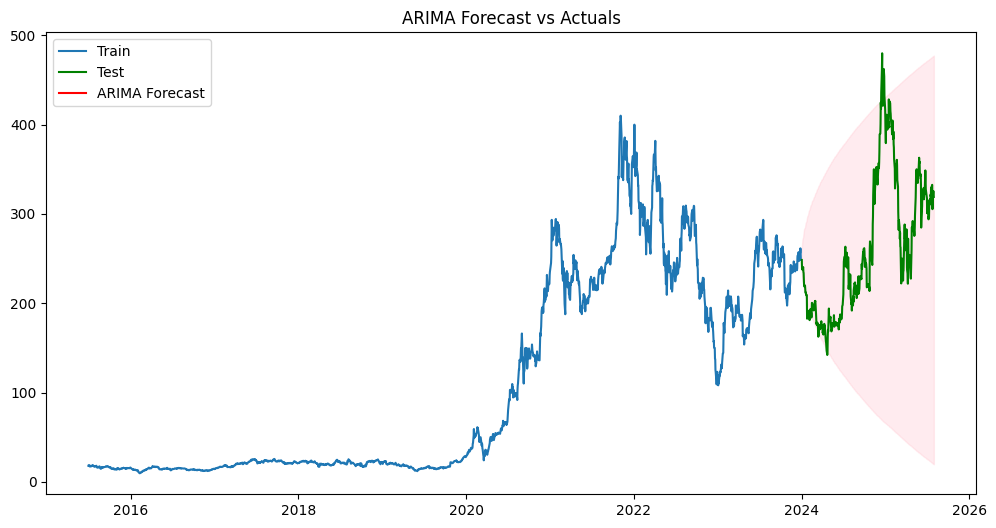

ValueError: Input contains NaN.

In [4]:
import pmdarima as pm
import matplotlib.pyplot as plt

# Fit ARIMA model
arima_model = pm.auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast
n_periods = len(test)
arima_forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Index forecast
forecast_index = test.index
arima_forecast = pd.Series(arima_forecast, index=forecast_index)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title("ARIMA Forecast vs Actuals")
plt.legend()
plt.show()

# Evaluate
mae = mean_absolute_error(test, arima_forecast)
rmse = np.sqrt(mean_squared_error(test, arima_forecast))
mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

print(f"ARIMA - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")


In [7]:
print("ARIMA model summary:")
print(arima_model.summary())


ARIMA model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2140
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6822.236
Date:                Tue, 12 Aug 2025   AIC                          13646.472
Time:                        05:54:42   BIC                          13652.140
Sample:                             0   HQIC                         13648.546
                               - 2140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        34.5030      0.413     83.548      0.000      33.694      35.312
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):             10936.43
Prob(Q):                  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

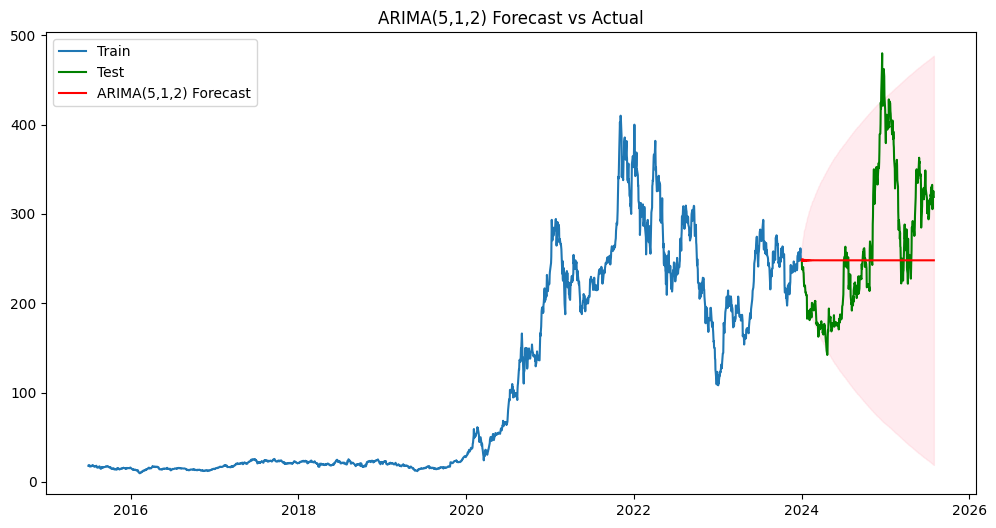

✅ ARIMA(5,1,2) - MAE: 62.9638, RMSE: 78.0408, MAPE: 24.04%


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Try a stronger ARIMA model manually
model = ARIMA(train, order=(5,1,2))  # You can try tuning this
fitted_model = model.fit()

# Forecast
forecast_result = fitted_model.get_forecast(steps=len(test))
arima_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Align index
arima_forecast.index = test.index
conf_int.index = test.index

# Plot
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(arima_forecast, label='ARIMA(5,1,2) Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("ARIMA(5,1,2) Forecast vs Actual")
plt.legend()
plt.show()

# Evaluate
aligned_test = test.loc[arima_forecast.index].dropna()
aligned_forecast = arima_forecast.loc[aligned_test.index].dropna()

mae = mean_absolute_error(aligned_test, aligned_forecast)
rmse = np.sqrt(mean_squared_error(aligned_test, aligned_forecast))
mape = np.mean(np.abs((aligned_test - aligned_forecast) / aligned_test)) * 100

print(f"✅ ARIMA(5,1,2) - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")


In [1]:
!pip install numpy==1.24.4 pmdarima==2.0.4


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make sure index alignment is correct
aligned_test = test.loc[arima_forecast.index].dropna()
aligned_forecast = arima_forecast.loc[aligned_test.index].dropna()

# Evaluation metrics
mae = mean_absolute_error(aligned_test, aligned_forecast)
rmse = np.sqrt(mean_squared_error(aligned_test, aligned_forecast))
mape = np.mean(np.abs((aligned_test - aligned_forecast) / aligned_test)) * 100

print(f"✅ ARIMA(5,1,2) Evaluation:\nMAE: {mae:.4f}\nRMSE: {rmse:.4f}\nMAPE: {mape:.2f}%")


✅ ARIMA(5,1,2) Evaluation:
MAE: 62.9638
RMSE: 78.0408
MAPE: 24.04%
